# Introduction

The sinking of Titanic is one of the most notorious shipwrecks in history. In 1912, during her voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

## Contents

1. [Load and Check Data](#load-and-check-data)  
2. [Variable Description](#variable-description)  
    * [Univariate Variable Analysis](#univariate-variable-analysis)  
        * [Categorical Variable Analysis](#categorical-variable-analysis)  
        * [Numerical Variable Analysis](#numerical-variable-analysis)  
3. [Basic Data Analysis](#basic-data-analysis)  
4. [Outlier Detection](#outlier-detection)  
5. [Missing Value](#missing-value)  
    * [Find Missing Value](#find-missing-value)  
    * [Fill Missing Value](#fill-missing-value)  

6. [Visualization](#visualization)  
    * [Correlation Between SibSp, Parch, Age, Fare and Survived](#correlation-between-sibsp-parch-age-fare-and-survived)  
    * [SibSp vs Survived](#sibsp-vs-survived)  
    * [Parch vs Survived](#parch-vs-survived)  
    * [Pclass vs Survived](#pclass-vs-survived)  
    * [Age vs Survived](#age-vs-survived)  
    * [Pclass vs Age vs Survived](#pclass-vs-age-vs-survived)  
    * [Embarked, Sex, Pclass vs Survived](#embarked-sex-pclass-vs-survived)  
    * [Embarked, Sex, Fare vs Survived](#embarked-sex-fare-vs-survived)  
    * [Fill Missing Age Feature](#fill-missing-age-feature)  

7. [Feature Engineering](#feature-engineering)  
    * [Name to Title](#name-to-title)  
    * [Family Size](#family-size)  
    * [Embarked](#embarked)  
    * [Ticket](#ticket)  
    * [Pclass](#pclass-feature)  
    * [Sex](#sex)  
    * [Drop Passenger ID and Cabin](#drop-passenger-id-and-cabin)  

8. [Modeling](#modeling)  
    * [Train-Test Split](#train-test-split)  
    * [Simple Logistic Regression](#simple-logistic-regression)  
    * [Hyperparameter Tuning](#hyperparameter-tuning)  
        * [Grid Search](#grid-search)  
        * [Cross Validation](#cross-validation)  
    * [Ensemble Modeling](#ensemble-modeling)  
    * [Prediction and Submission](#prediction-and-submission)  


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load and Check Data


In [ ]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df =  pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassengerId = test_df["PassengerId"]


In [ ]:
train_df.columns

In [ ]:
train_df.head()

In [ ]:
train_df.describe()


# Variable Description
1. PassengerId: unique id number to each passenger
2. Survived: passenger survive(1) or died(0)
3. Pclass: passenger class
4. Name: name
5. Sex: gender of passenger
6. Age: age of passenger
7. SibSp: number of siblings/spouses
8. Parch: number of parents/children
9. Ticket: ticket number
10. Fare: amount of money spent on ticket
11. Cabin: cabin category
12. Embarked: port where passenger embarked (c = cherbourg, Q = Queenstown,S = Southampton)


    
  

In [ ]:
train_df.info()

* float64(2) : Fare and Age
* int64(5) : Pclass, sibsp, parch, passengerId, and survived
* object(5) : Cabin, embarked, ticket, name, and sex

## Univariate Variable Analysis
 * Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
 * Numerical Variable: Fare, Age, PassengerId,


### Categorical Variable

In [ ]:
def bar_plot(variable):
    """
       input:variable ex: "Sex"
       output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()

    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{} : \n {}".format(variable,varValue))

In [ ]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

In [ ]:
 "Variables that become more complex when visualized."
category2 = ["Cabin","Name","Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))
    

### Numerical Variable 

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [ ]:
numericVar = ["Fare","Age","PassengerId"]
for n in numericVar: 
    plot_hist(n)

# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [ ]:
# Pclass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index = False).mean().sort_values(by="Survived",ascending = False)


In [ ]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"],as_index = False).mean().sort_values(by="Survived",ascending = False)

In [ ]:
# SibSp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index = False).mean().sort_values(by = "Survived",ascending = False)

In [ ]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"],as_index = False).mean().sort_values(by = "Survived", ascending = False)

In [ ]:
# Embarked vs Survived
train_df[["Embarked","Survived"]].groupby(["Embarked"],as_index = False).mean().sort_values(by = "Survived",ascending = False)

# Outlier Detection

In [ ]:
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c], 25)
        # 3rd quartile
        Q3 = np.percentile(df[c], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # Detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indices
        outlier_indices.extend(outlier_list_col)

    # Count the number of outliers per row index
    outlier_indices = Counter(outlier_indices)
    # Only keep those that are outliers in more than 2 features
    multiple_outliers = [i for i, v in outlier_indices.items() if v > 2]

    return multiple_outliers



In [ ]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

In [ ]:
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

# Missing Value
* Find Missing Value
* Fill Missing Value

In [ ]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [ ]:
train_df.head()

## Find Missing Value

In [ ]:
train_df.columns[train_df.isnull().any()]

In [ ]:
train_df.isnull().sum()

## Fill Missing Value
* Embarked has 2 missing value
* Fare has only 1

In [ ]:
train_df[train_df["Embarked"].isnull()]

In [ ]:
train_df.boxplot(column = "Fare",by = "Embarked")
plt.show()

In [ ]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

In [ ]:
train_df[train_df["Fare"].isnull()]

In [ ]:
np.mean(train_df[train_df["Pclass"] == 3]["Fare"])

In [ ]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3] ["Fare"]))

In [ ]:
train_df[train_df["Fare"].isnull()]

# Visualization # 

**Correlation Between Sibsp -- Parch --Age --Fare -- Survived**

In [ ]:
list1 = ["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt =".2f")
plt.show()

**SibSp -- Survived**

In [ ]:
g = sns.catplot(x = "SibSp", y = "Survived", data = train_df,kind = "bar")
g.set_ylabels("Survived Probability")
plt.show()

* Having a lot of SibSp have less chance to survive.
* if sibsp == 0 or 1 or 2, passenger has more chance to survive.
* we can consider a new feature describing these categories.

# Parch -- Survived

In [ ]:
g = sns.catplot(x = "Parch",y = "Survived",kind = "bar",data = train_df)
g.set_ylabels("Survived Probability")
plt.show()

# Pclass --Survived

In [ ]:
g = sns.catplot(x = "Pclass",y ="Survived",data = train_df,kind = "bar")
g.set_ylabels("Survived Probability")
plt.show()

# Age -- Survived

In [ ]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

* age <= 10 has a high survival rate,
* oldest passengers (80) survived,
* large number of 20 years old did not survive,
* most passengers are in 15-35 age range,
* use age feature in training
* use age  distribution for missing value of age


# Pclass --Survived --Age

In [ ]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass")
g.map(plt.hist,"Age", bins = 25)
g.add_legend()
plt.show()

# Embarked --Sex --Pclass --Survived

In [ ]:
g = sns.FacetGrid(train_df,row = "Embarked")
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

* Female passengers have much better survival rate than males.
* males have better survival rate in pclass 3 in C.
* Embarked and sex will be used in training.


# Embarked --Sex --Fare --Survived # 

In [ ]:
g = sns.FacetGrid(train_df,row = "Embarked", col = "Survived")
g.map(sns.barplot,"Sex","Fare")
g.add_legend()
plt.show()

* Passengers who pay higher fare have better survival. Fare can be used as categorical for training.

# Fill Missing : Age Feature

In [ ]:
train_df[train_df["Age"].isnull()]

In [ ]:
sns.catplot(x = "Sex", y = "Age", data = train_df, kind = "box")
plt.show()

Sex is not informative for age distribution seems to be same.

In [ ]:
sns.catplot(x = "Sex", y = "Age", hue = "Pclass", data = train_df, kind = "box")
plt.show()

1st  class passengers are older than 2nd, and 2nd is older than 3rd class.

In [ ]:
sns.catplot(x = "Parch",y = "Age", data = train_df, kind = "box")
sns.catplot(x = "SibSp",y = "Age", data = train_df,kind = "box")
plt.show()

In [ ]:
sns.heatmap(train_df[["Age","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

In [ ]:
# Fill missing values in the Age feature
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & (train_df["Parch"] == train_df.iloc[i]["Parch"])&(train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [ ]:
train_df[train_df["Age"].isnull()]

# Feature Engineering

**Name -- Title**

In [ ]:
train_df["Name"].head(10)

In [ ]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [ ]:
train_df["Title"].head(10)

In [ ]:
sns.countplot(x ="Title",data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
# convert to categorical
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i== "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs"else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

In [ ]:
sns.countplot(x = "Title",data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
g = sns.catplot(x = "Title",y = "Survived", data = train_df, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [ ]:
train_df.drop(labels = ["Name"],axis = 1,inplace = True)

In [ ]:
train_df.head()

In [ ]:
# get_dummies ile kategorik değişkenleri sayısal değişkenlere dönüştürür
train_df = pd.get_dummies(train_df , columns = ["Title"])
train_df.head()

# Family Size

In [ ]:
train_df.head()

In [ ]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1 

In [ ]:
train_df.head()

In [ ]:
g = sns.catplot(x = "Fsize", y = "Survived",data = train_df,kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [ ]:
train_df["Family_size"] = [1 if i < 5 else 0  for i in train_df["Fsize"]]

In [ ]:
train_df.head(10)

In [ ]:
# kategorik değer sayısına bakma
sns.countplot(x = "Family_size", data = train_df)
plt.show()

In [ ]:
g = sns.catplot(x = "Family_size", y = "Survived",data = train_df,kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [ ]:
train_df = pd.get_dummies(train_df , columns = ["Family_size"])
train_df.head()

# Embarked

In [ ]:
train_df["Embarked"].head()

In [ ]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [ ]:
train_df = pd.get_dummies(train_df, columns =["Embarked"])
train_df.head()

# Ticket

In [ ]:
train_df["Ticket"].head(20)

In [ ]:
a = "A/5. 2151"
a.replace(".","").replace("/","").strip().split(" ")[0]

In [ ]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [ ]:
train_df["Ticket"].head(20)

In [ ]:
train_df.head()

In [ ]:
#kategorik --> numerik
train_df = pd.get_dummies(train_df, columns = ["Ticket"], prefix = "T")
train_df.head(10)

# Pclass

In [ ]:
sns.countplot(x = "Pclass", data =train_df)
plt.show()

In [ ]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
pd.get_dummies(train_df, columns = ["Pclass"])
train_df.head()

# Sex

In [ ]:
train_df["Sex"] = train_df["Sex"].astype("category")
pd.get_dummies(train_df, columns = ["Sex"])
train_df.head()

# Drop Passenger ID and Cabin

In [ ]:
train_df.drop(labels = ["PassengerId","Cabin"], axis = 1,inplace = True)

In [ ]:
train_df.columns

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train - Test Split

In [ ]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size = 0.33,random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

# Simple Logistic Regression

In [170]:
from sklearn.impute import SimpleImputer
# Eksik değerleri ortalama ile doldurma
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train_imputed,y_train)
acc_log_train = round(logreg.score(X_train_imputed,y_train)*100,2)
acc_log_test = round(logreg.score(X_test_imputed,y_test)*100,2)
print("Training Accuracy: % {} ".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 83.39 
Testing Accuracy: % 84.07


# Hyperparameter Tuning -- Grid Search -- Cross Validation 

We will compare 5 ml classifier and evulate mean accuracy of each of them by stratified cross validation.

* Decision tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [201]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


random_state = 42

# Pipeline ile her modelin içine imputer ekliyoruz (INPUT NAN VALUE PROBLM)
classifiers = [
    Pipeline([('imputer', SimpleImputer()), ('model', DecisionTreeClassifier(random_state=random_state))]),
    Pipeline([('imputer', SimpleImputer()), ('model', SVC(random_state=random_state))]),
    Pipeline([('imputer', SimpleImputer()), ('model', RandomForestClassifier(random_state=random_state))]),
    Pipeline([('imputer', SimpleImputer()), ('model', LogisticRegression(random_state=random_state, max_iter=1000))]),
    Pipeline([('imputer', SimpleImputer()), ('model', KNeighborsClassifier())])
]

# Writing hyperparameters for models
dt_param_grid = {"model__min_samples_split": range(10,500,20),
                 "model__max_depth": range(1,20,2)}
svc_param_grid = {"model__kernel": ["rbf"],
                  "model__gamma": [0.001, 0.01, 0.1, 1],
                  "model__C": [1, 10, 50, 100, 200, 300, 1000]}
rf_param_grid = {
                "model__max_features": [1, 3, 10],
                "model__min_samples_split": [2, 3, 10],
                "model__min_samples_leaf": [1, 3, 10],
                "model__bootstrap": [False],
                "model__n_estimators": [100, 300],
                "model__criterion": ["gini"]
}
logreg_param_grid = {
                "model__C": np.logspace(-3, 3, 7),
                "model__penalty": ["l1", "l2"],
                "model__solver": ["liblinear"]
}

knn_param_grid = {
                "model__n_neighbors": np.linspace(1, 19, 10, dtype=int).tolist(),
                "model__weights": ["uniform", "distance"],
                "model__metric": ["euclidean", "manhattan"]
}
classifier_param = [dt_param_grid,
                    svc_param_grid,
                    rf_param_grid,
                    logreg_param_grid,
                    knn_param_grid]


In [205]:
cv_result = []
best_estimators = []
for i in range(len(classifiers)):
    clf = GridSearchCV(estimator = classifier[i],param_grid = classifier_param[i],cv = StratifiedKFold(n_splits = 10),scoring = "accuracy",n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.818728813559322
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8087570621468926
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8322033898305085
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8204802259887005
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7802824858757061


In [206]:
cv_results = pd.DataFrame({"Cross Validation Accuracy Means":cv_result,"ML Models":["DecisionTreeClassifier","SVM","RandomForestClassifier","LogistickRegression","KNeighborsClassifier"]})
cv_results

,Cross Validation Accuracy Means,ML Models
0,0.818729,DecisionTreeClassifier
1,0.808757,SVM
2,0.832203,RandomForestClassifier
3,0.820480,LogistickRegression
4,0.780282,KNeighborsClassifier


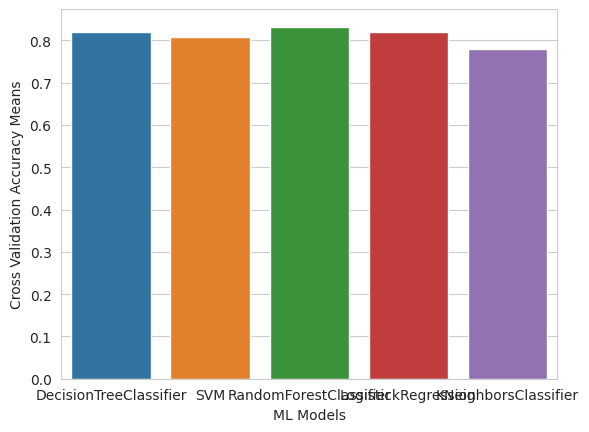

In [208]:
# The selection of the best model and the best hyperparameters has been completed.
s = sns.barplot(cv_results, x = "ML Models", y = "Cross Validation Accuracy Means")

# Ensemble Modeling

In [211]:
# modellerin tahminiyle en yaygın oy ile son tahmini verir
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                         ("rfc",best_estimators[2]),
                                         ("lr",best_estimators[3])],
                                         voting = "soft",n_jobs = -1)


votingC  = votingC.fit(X_train,y_train)
print(accuracy_score(votingC.predict(X_test),y_test))


0.8135593220338984
